# Note

Please scroll-down to section HOMEWORK 2 for latest homework


### HOMEWORK 0

In [303]:
import numpy, json, math
from PIL import Image

In [304]:
im = Image.new("RGB",[256,256],0x000000)
width, height = im.size

In [305]:
for y in range(height):
  for x in range(width):
      im.putpixel((x,y),(0,0,0))

In [306]:
for y in range(32):
  for x in range(32):
      im.putpixel((x,y),(255,0,0))

In [307]:
for y in range(32):
  for x in range(32):
      im.putpixel((x+64,y+64),(255,255,0))

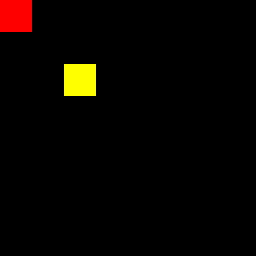

In [308]:
im

##HOMEWORK **1**


In [309]:
import numpy, json, math
from PIL import Image

In [310]:
im = Image.new("RGB",[512,512],0x000000)
url = 'https://raw.githubusercontent.com/DhruvSrivastava-16/CSCI580/main/rectangle.json'
resp = requests.get(url)
rectangle_data = json.loads(resp.text)

In [311]:
def colour_fill(x_min, x_max, y_min, y_max, R, G, B, im):

  x_min = max(0,min(x_min,511))
  x_max = max(0,min(x_max,511))

  y_min = max(0,min(y_min,511))
  y_max = max(0,min(y_max,511))


  for x in range(x_min,x_max+1):
    for y in range(y_min, y_max+1):
      im.putpixel((x,y),(R,G,B))


In [312]:
for itr in range(len(rectangle_data['rects'])):
  x_min, x_max = rectangle_data['rects'][itr]['xmin'], rectangle_data['rects'][itr]['xmax']
  y_min, y_max = rectangle_data['rects'][itr]['ymin'], rectangle_data['rects'][itr]['ymax']
  R, G, B = rectangle_data['rects'][itr]['RGB'][0], rectangle_data['rects'][itr]['RGB'][1], rectangle_data['rects'][itr]['RGB'][2]
  colour_fill(x_min, x_max, y_min, y_max, R, G, B, im)

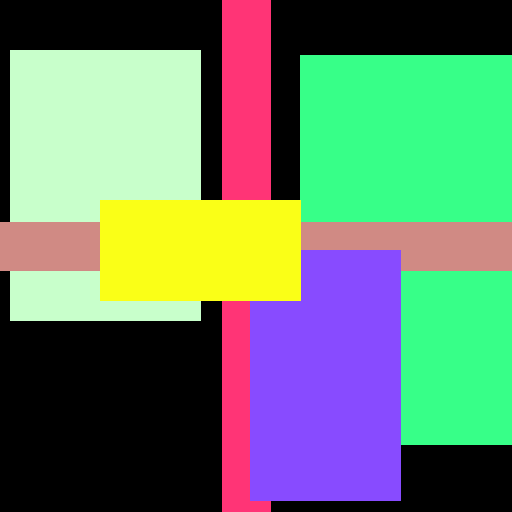

In [313]:
im

## HOMEWORK **2**

Execite all cells from Cell 273

In [314]:
import numpy, json, math, requests
from PIL import Image

In [315]:
im = Image.new('RGB',[256,256],color = (255,255,0))
url = 'https://raw.githubusercontent.com/DhruvSrivastava-16/CSCI580/main/teapot.json'
resp = requests.get(url)
teapot_data = json.loads(resp.text)
teapot_data = teapot_data['data']

In [316]:
def line_equations(X,Y,pixel_x,pixel_y):
  f01 = (Y[0] - Y[1])*pixel_x + (X[1] - X[0])*pixel_y + (X[0]*Y[1]) - (X[1]*Y[0])
  f12 = (Y[1] - Y[2])*pixel_x + (X[2] - X[1])*pixel_y + (X[1]*Y[2]) - (X[2]*Y[1])
  f20 = (Y[2] - Y[0])*pixel_x + (X[0] - X[2])*pixel_y + (X[2]*Y[0]) - (X[0]*Y[2])
  
  return [f01,f12,f20]


In [317]:
Z_Buff = [[float('inf') for r in range(256)] for c in range(256)]

In [318]:
def computeTriangleColor(normal):
  
  triColor = [0,0,0]
  dotp = 0.707*normal[0] + 0.5*normal[1] + 0.5*normal[2]
  

  if (dotp < 0.0):
    dotp = -dotp
  elif (dotp > 1.0):
    dotp = 1.0

  triColor[0] = 0.95*dotp
  triColor[1] = 0.65*dotp
  triColor[2] = 0.88*dotp

  return triColor


In [319]:
for itr in range(len(teapot_data)):

  X, Y, Z = [], [], []
  Colour = computeTriangleColor(teapot_data[itr]['v0']['n'])

  for point in ['v0','v1','v2']:
    x, y, z = teapot_data[itr][point]['v'][0], teapot_data[itr][point]['v'][1], teapot_data[itr][point]['v'][2]
    x, y = max(0,min(x,255)), max(0,min(y,255))
    X.append(x)
    Y.append(y)
    Z.append(z)

  xmin, xmax = math.floor(min(X)), math.ceil(max(X))
  ymin, ymax = math.floor(min(Y)), math.ceil(max(Y))

  for x in range(xmin, xmax + 1):
    for y in range(ymin, ymax + 1):

      numerator_f = line_equations(X,Y,x,y)
      denominator_f_alpha = line_equations(X,Y,X[0],Y[0])
      denominator_f_beta = line_equations(X,Y,X[1],Y[1])
      denominator_f_gamma = line_equations(X,Y,X[2],Y[2])

      Alpha = (numerator_f[1]/denominator_f_alpha[1]) if denominator_f_alpha[1]!=0 else 0
      Beta = (numerator_f[2]/denominator_f_beta[2]) if denominator_f_beta[2]!=0 else 0
      Gamma = (numerator_f[0]/denominator_f_gamma[0]) if denominator_f_gamma[0]!=0 else 0

      if Alpha >= 0 and Beta >= 0 and Gamma >= 0:
        Z_pixel = Alpha*Z[0] + Beta*Z[1] + Gamma*Z[2]

        if Z_pixel < Z_Buff[x][y]:
          
          im.putpixel((x, y), (int(Colour[0]*255),int(Colour[1]*255),int(Colour[2]*255)))
          Z_Buff[x][y] = Z_pixel
        
   

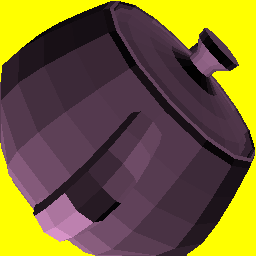

In [320]:
im

In [321]:
im.save('Teapot_Generated.png')